## Work
1. 請嘗試將 preproc_x 替換成以每筆資料的 min/max 進行標準化至 -1 ~ 1 間，再進行訓練
2. 請嘗試將 mlp 疊更深 (e.g 5~10 層)，進行訓練後觀察 learning curve 的走勢
3. (optional) 請改用 GPU 進行訓練 (如果你有 GPU 的話)，比較使用 CPU 與 GPU 的訓練速度

In [1]:
## 
"""
Your code here (optional)
確認硬體資源
"""


In [1]:
import os
import keras
import numpy as np
# 請嘗試設定 GPU：os.environ


C:\Users\wjr63\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [21]:
## 資料前處理
"""
Your code here
"""
## 資料前處理
def preproc_x(x, flatten=True):
    x = (x / 255) * 2 - 1
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [22]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [23]:
x_train[0:5]

array([[-0.5372549 , -0.51372549, -0.50588235, ..., -0.03529412,
        -0.27843137, -0.43529412],
       [ 0.20784314,  0.38823529,  0.46666667, ...,  0.12156863,
         0.04313725,  0.12941176],
       [ 1.        ,  1.        ,  1.        , ..., -0.37254902,
        -0.3254902 , -0.34117647],
       [-0.78039216, -0.80392157, -0.92156863, ..., -0.43529412,
        -0.49019608, -0.63921569],
       [ 0.33333333,  0.41176471,  0.55294118, ..., -0.42745098,
        -0.39607843, -0.37254902]])

In [25]:
"""Code Here
建立你的神經網路
"""
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128, 64, 32]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

model = build_mlp(input_shape=x_train.shape[1:])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
hidden_layer4 (Dense)        (None, 64)                8256      
_________________________________________________________________
hidden_layer5 (Dense)        (None, 32)                2080      
_________________________________________________________________
output (Dense)               (None, 10)                330       
Total para

In [26]:
## 超參數設定
LEARNING_RATE = 0.001
EPOCHS = 100
BATCH_SIZE = 256

In [27]:
optimizer = keras.optimizers.Adam(lr=LEARNING_RATE)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

In [28]:
model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 7s 132us/step - loss: 1.7126 - acc: 0.3910 - val_loss: 1.5270 - val_acc: 0.4565.7412 
Epoch 2/100
50000/50000 [==============================] - 4s 86us/step - loss: 1.4744 - acc: 0.4800 - val_loss: 1.4869 - val_acc: 0.4674
Epoch 3/100
50000/50000 [==============================] - 4s 83us/step - loss: 1.3577 - acc: 0.5221 - val_loss: 1.4257 - val_acc: 0.5009
Epoch 4/100
50000/50000 [==============================] - 4s 83us/step - loss: 1.2678 - acc: 0.5523 - val_loss: 1.3771 - val_acc: 0.5162
Epoch 5/100
50000/50000 [==============================] - 4s 83us/step - loss: 1.1816 - acc: 0.5829 - val_loss: 1.3686 - val_acc: 0.5168
Epoch 6/100
50000/50000 [==============================] - 4s 83us/step - loss: 1.1021 - acc: 0.6123 - val_loss: 1.3603 - val_acc: 0.5320
Epoch 7/100
50000/50000 [==============================] - 4s 83us/step - loss: 1.0261 - acc: 0.6364 - val_loss: 1.

50000/50000 [==============================] - 4s 90us/step - loss: 0.0789 - acc: 0.9742 - val_loss: 3.7318 - val_acc: 0.5252
Epoch 60/100
50000/50000 [==============================] - 4s 89us/step - loss: 0.0975 - acc: 0.9675 - val_loss: 3.8382 - val_acc: 0.5269
Epoch 61/100
50000/50000 [==============================] - 4s 89us/step - loss: 0.1260 - acc: 0.9586 - val_loss: 3.6401 - val_acc: 0.5297
Epoch 62/100
50000/50000 [==============================] - 4s 89us/step - loss: 0.0954 - acc: 0.9682 - val_loss: 3.6487 - val_acc: 0.5319
Epoch 63/100
50000/50000 [==============================] - 4s 90us/step - loss: 0.0854 - acc: 0.9721 - val_loss: 3.7295 - val_acc: 0.5255
Epoch 64/100
50000/50000 [==============================] - 4s 90us/step - loss: 0.0841 - acc: 0.9716 - val_loss: 3.7606 - val_acc: 0.5306
Epoch 65/100
50000/50000 [==============================] - 4s 90us/step - loss: 0.0809 - acc: 0.9726 - val_loss: 3.8384 - val_acc: 0.5310
Epoch 66/100
50000/50000 [==============

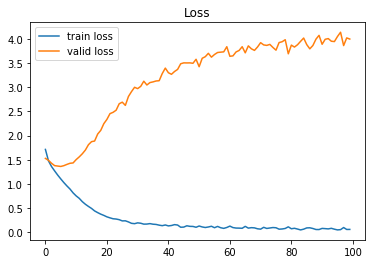

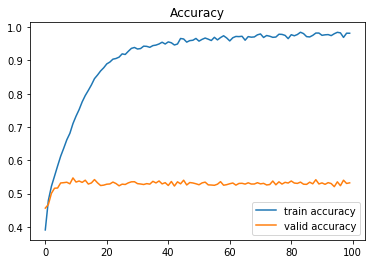

In [30]:
import matplotlib.pyplot as plt


train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()